# **Assignment 1** (Intro to Machine Learning)

## Note:

* The dataset to be used is `attrition.csv`. This dataset reveals whether a particular employee left the company or not.  
* In this dataset, the column named `Attrition` is the target variable and the remaining columns are features. Please note that `Attrition = 1` means the employee left the company, whereas `Attrition = 0` means the opposite of this statement. 
*  This dataset has been loaded in this assignment as shown below. In case, you are not able to load this data, please note that this data is stored separately as well in the assignment folder. 

In [0]:
import pandas as pd

In [0]:
data_url = "https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L1/attrition.csv"
attrition_data = pd.read_csv(data_url)

In [94]:
attrition_data.head()
#attrition_data.shape


Age  Attrition  ... YearsWithCurrManager  ID
0   41          1  ...                    5   0
1   49          0  ...                    7   1
2   37          1  ...                    0   2
3   33          0  ...                    0   3
4   27          0  ...                    2   4

[5 rows x 34 columns]

In [0]:
# Loading the Basic packages
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
# Loading the machine learning packages 
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import mean_absolute_error, accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

In [97]:
# finding the unique values ofdifferent features
attrition_data.Department.value_counts()
attrition_data.BusinessTravel.value_counts()
attrition_data.EducationField.value_counts()
attrition_data.JobRole.value_counts()
attrition_data.MaritalStatus.value_counts()

Married     454
Single      342
Divorced    232
Name: MaritalStatus, dtype: int64

In [98]:
# Conversion of all the features into numerical values
le = LabelEncoder() 
  
attrition_data['Department']= le.fit_transform(attrition_data['Department']) 
attrition_data['Gender']= le.fit_transform(attrition_data['Gender'])
attrition_data['MaritalStatus']= le.fit_transform(attrition_data['MaritalStatus'])
attrition_data['JobRole']= le.fit_transform(attrition_data['JobRole'])
attrition_data['BusinessTravel']= le.fit_transform(attrition_data['BusinessTravel'])
attrition_data['EducationField']= le.fit_transform(attrition_data['EducationField'])
attrition_data['OverTime']= le.fit_transform(attrition_data['OverTime'])

attrition_data.head()

Age  Attrition  ...  YearsWithCurrManager  ID
0   41          1  ...                     5   0
1   49          0  ...                     7   1
2   37          1  ...                     0   2
3   33          0  ...                     0   3
4   27          0  ...                     2   4

[5 rows x 34 columns]

In [99]:
attrition_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
ID        

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8274a53a90>,
      dtype=object)

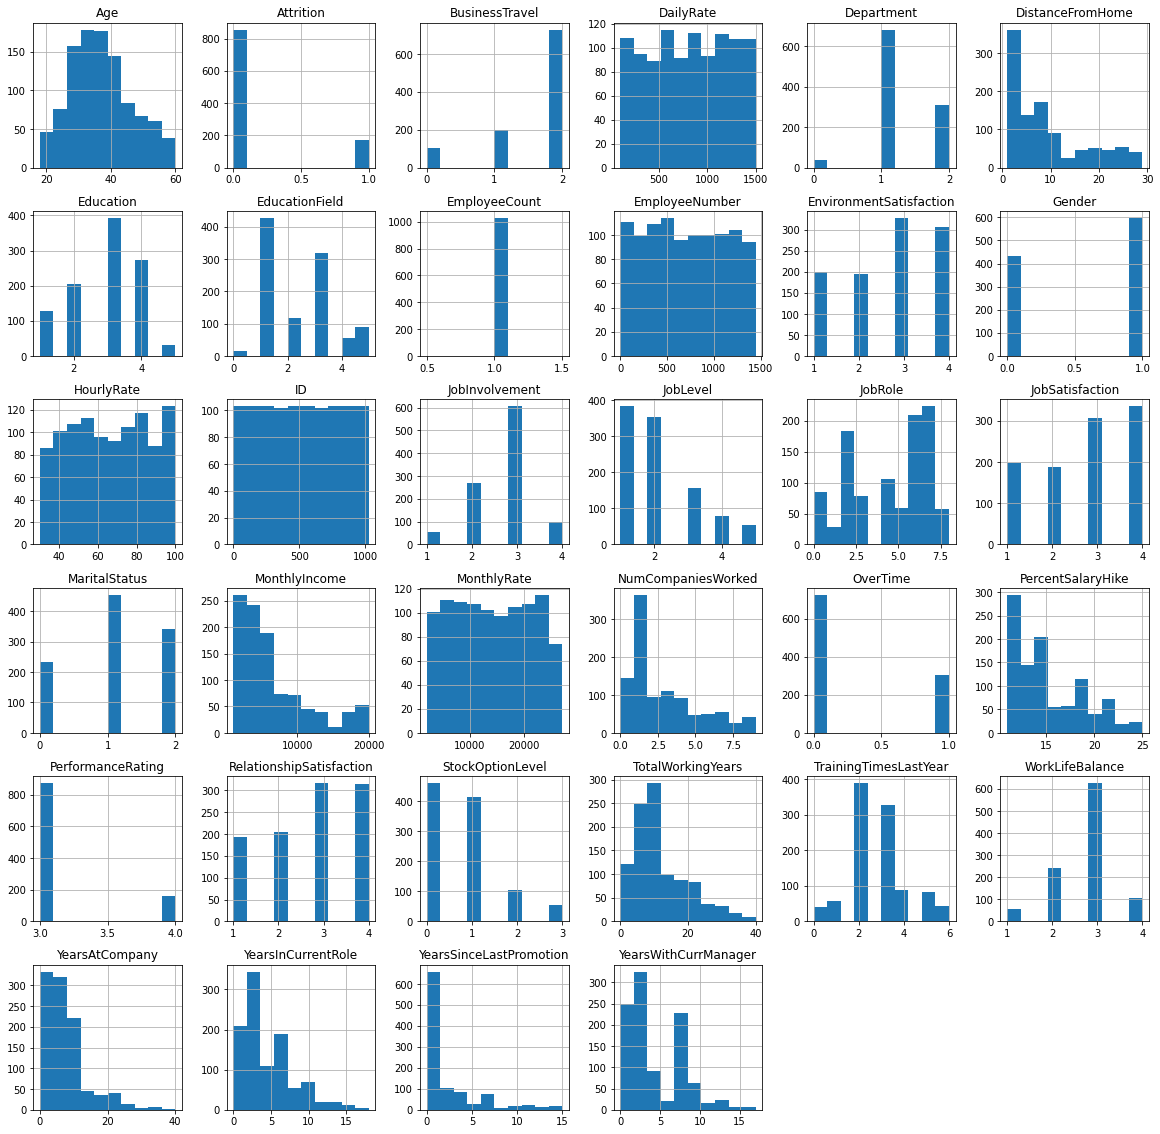

In [100]:
# Data Visualization by plotting Histogram
attrition_data.hist(figsize=(20,20))

In [101]:
# ID and MonthlyRate can be neglected
X =attrition_data.drop(['MonthlyRate','ID','HourlyRate','DailyRate'],axis=1)
Y=attrition_data['Attrition']
X.shape

(1028, 30)

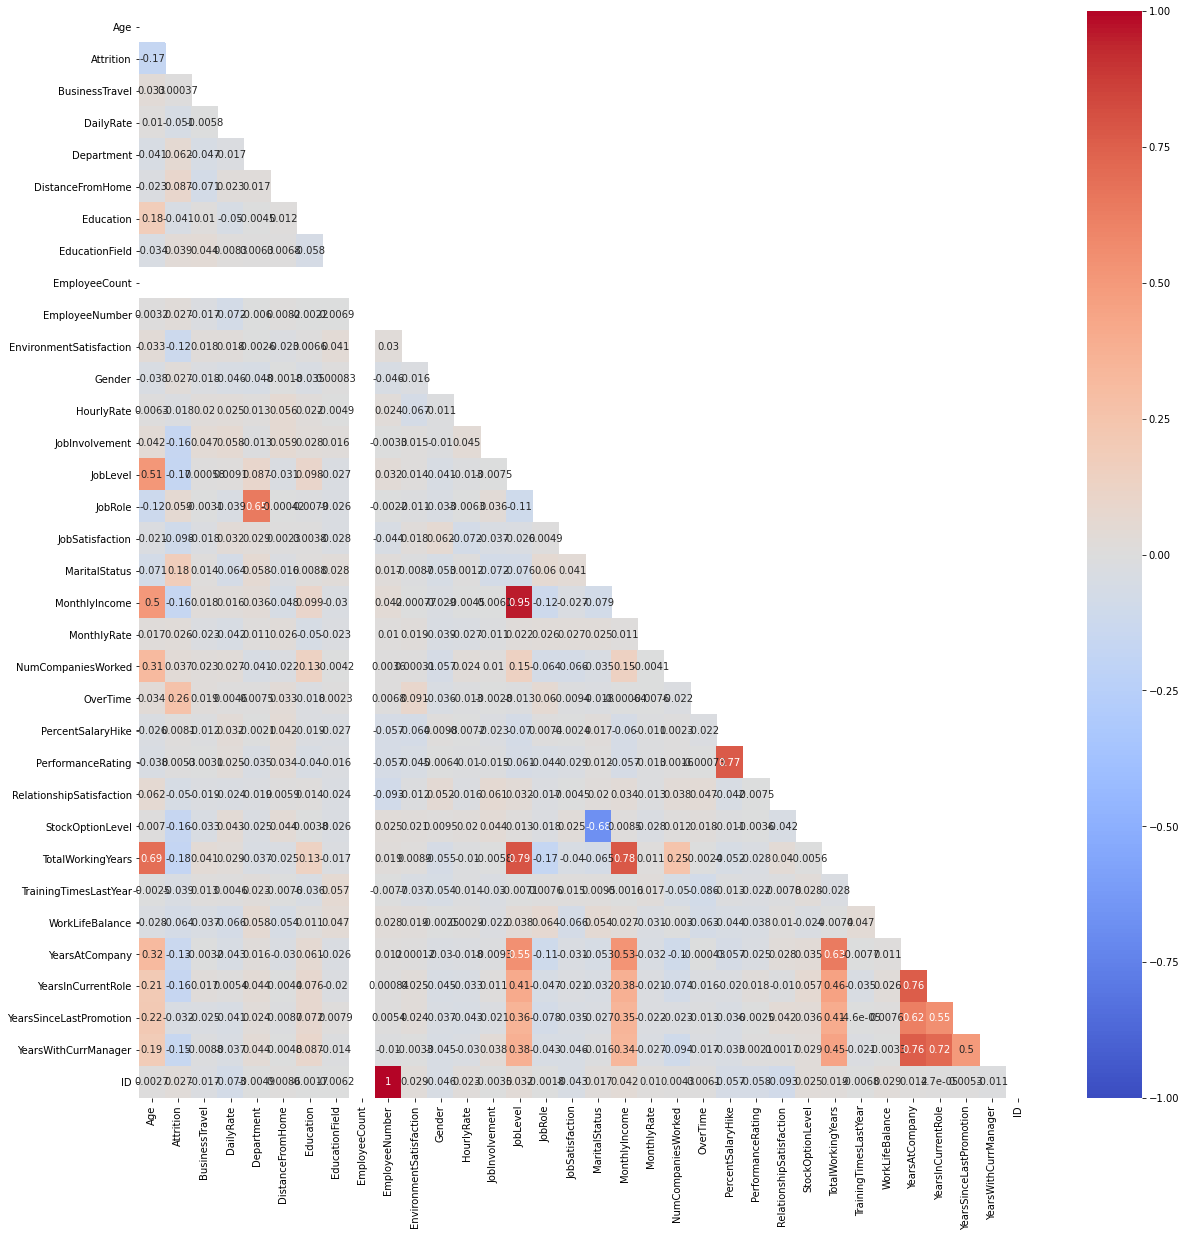

In [102]:
#Visualization of Data using Correlation Matrix
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
mask = np.zeros_like(attrition_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(attrition_data.corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=True,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [103]:
from sklearn import preprocessing,StandardScaler

#x = attrition_data.iloc[:, 19:21].values
#min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
#x_after_min_max_scaler = min_max_scaler.fit_transform(x) 
#print ("\nAfter min max Scaling : \n", x_after_min_max_scaler)

ImportError: ignored

In [0]:
#x = attrition_data(['MonthlyIncome'],['Age']).values
#x = attrition_data[:,1,19].values
#min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
#x_after_min_max_scaler = min_max_scaler.fit_transform(x)

In [0]:
Age1=attrition_data.Age
Age1_scaled= preprocessing.scale(Age1)
print("\nAfter Scaling :\n", Age1_scaled)

In [0]:
MonthlyIncome1=attrition_data.MonthlyIncome
MonthlyIncome1_scaled=preprocessing.scale(MonthlyIncome1)
print("\nAfter Scaling :\n", MonthlyIncome1_scaled)
attrition_data['MonthlyIncome']=attrition_data['MonthlyIncome1']

In [0]:
MonthlyIncome_scaled=preprocessing.scale(attrition_data.MonthlyIncome)
attrition_data.MonthlyIncome=attrition_data.MonthlyIncome1

In [0]:
Age1=attrition_data.Age
Scaler = preprocessing.StandardScaler().fit(Age1)
Scaler
StandardScaler

#Age1_after_Standardisation = Standardisation.fit_transform(Age1) 
#print ("\nAfter Standardisation : \n", Age1_after_Standardisation)

In [0]:
X =attrition_data.drop(['MonthlyRate','ID','HourlyRate','DailyRate'],axis=1)
y=attrition_data['Attrition']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 123)

rfr = RandomForestRegressor(n_estimators=25,random_state=1111,max_features=4)
rfr.fit(X_train,y_train)

print('The training error is {0:.2f}'.format(mean_absolute_error(y_train, rfr.predict(X_train))))
print('The testing error is {0:.2f}'.format(mean_absolute_error(y_test, rfr.predict(X_test))))
rfr.get_params()

In [0]:
plt.plot(y_test, 'o')
plt.plot(rfr.predict(X_test))

In [0]:
# applying XGB Classifier:

In [0]:
X =attrition_data.drop(['MonthlyRate','ID','HourlyRate','DailyRate'],axis=1)
y=attrition_data['Attrition']

In [0]:
ss = StandardScaler()
X = ss.fit_transform(X)


In [0]:
X_train,y_train,X_test,y_test= train_test_split(X,y,train_size=0.75,random_state=123)

In [109]:
xgb_clf= xgb.XGBClassifier(learning_rate=0.01)
xgb_clf.fit(X_train,y_train)

ValueError: ignored

## Instructions:

* You are required to use a classifier, which can predict the `Attrition` for the employees. 
* Before implementing any model, you will have to apply suitable encoding to the features and implement exploratory data analysis to know your data better. 
* You can either define your own custom-made classifer or select classifier(s) available in the `scikit-learn`.
* You are supposed to implement a minimum of three classifiers (e.g.  `RandomForestClassifier`, `XGBClassifier`, `DecisionTreeClassifier`, `KNeighborsClassifier`, etc.) and evaluate which one is giving the best peformance. 
* For each of the classifier,  report the accuracy, precision, recall, roc curve, etc. 

## Resources:

* You might want to refer to the [lecture notebook](https://github.com/shala2020/shala2020.github.io/tree/master/Lecture_Materials/Google_Colab_Notebooks/MachineLearning/L1) for revising the concepts.
* You can also refer to the pre-work material for the first lecture on ML.  